In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import statsmodels.api as sm

In [2]:
pd.Timestamp('2021-03-15')

Timestamp('2021-03-15 00:00:00')

In [3]:
# create a data range..
pd.timedelta_range(start= '1 day', end='31 day', freq='6H')

TimedeltaIndex([ '1 days 00:00:00',  '1 days 06:00:00',  '1 days 12:00:00',
                 '1 days 18:00:00',  '2 days 00:00:00',  '2 days 06:00:00',
                 '2 days 12:00:00',  '2 days 18:00:00',  '3 days 00:00:00',
                 '3 days 06:00:00',
                ...
                '28 days 18:00:00', '29 days 00:00:00', '29 days 06:00:00',
                '29 days 12:00:00', '29 days 18:00:00', '30 days 00:00:00',
                '30 days 06:00:00', '30 days 12:00:00', '30 days 18:00:00',
                '31 days 00:00:00'],
               dtype='timedelta64[ns]', length=121, freq='6H')

In [4]:
pd.date_range('2020-01-12', '2022-09-12', freq='W-MON')

DatetimeIndex(['2020-01-13', '2020-01-20', '2020-01-27', '2020-02-03',
               '2020-02-10', '2020-02-17', '2020-02-24', '2020-03-02',
               '2020-03-09', '2020-03-16',
               ...
               '2022-07-11', '2022-07-18', '2022-07-25', '2022-08-01',
               '2022-08-08', '2022-08-15', '2022-08-22', '2022-08-29',
               '2022-09-05', '2022-09-12'],
              dtype='datetime64[ns]', length=140, freq='W-MON')

In [5]:
# dummy data
date = pd.date_range('2020-01-12', '2022-09-12', freq='W-MON')
values = np.random.randn(140)

sample= pd.DataFrame({'date': date,'values': values})

In [6]:
sample.head(7)

,date,values
0,2020-01-13,0.101772
1,2020-01-20,-0.429553
2,2020-01-27,-0.133838
3,2020-02-03,-0.710383
4,2020-02-10,-0.931010
5,2020-02-17,-0.430763
6,2020-02-24,0.353119


In [4]:
np.quantile(a = sample['values'], q= .5)

-0.04387161426456012

In [43]:
np.mean(sample['values'])

-0.18927843667820696

In [44]:
np.median(sample['values'])

-0.18725174605755518

**Time series data analysis.**

In [7]:
df = pd.read_csv('data/s&p500.csv')

In [8]:
df.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [9]:
df['Date']= pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1768 non-null   datetime64[ns]
 1   SP500                 1768 non-null   float64       
 2   Dividend              1767 non-null   float64       
 3   Earnings              1764 non-null   float64       
 4   Consumer Price Index  1768 non-null   float64       
 5   Long Interest Rate    1768 non-null   float64       
 6   Real Price            1768 non-null   float64       
 7   Real Dividend         1767 non-null   float64       
 8   Real Earnings         1764 non-null   float64       
 9   PE10                  1648 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 138.2 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SP500,1768.0,258.374570,514.103382,2.73,7.7375,16.335,122.5250,2789.80
Dividend,1767.0,5.636486,9.647723,0.18,0.4100,0.830,6.3700,50.00
Earnings,1764.0,12.809932,23.854291,0.16,0.5400,1.325,13.6075,109.88
Consumer Price Index,1768.0,57.726640,70.812597,6.28,10.1000,18.200,90.8500,249.84
Long Interest Rate,1768.0,4.569559,2.289630,1.50,3.2900,3.860,5.2225,15.32
Real Price,1768.0,508.352856,544.306401,67.63,170.0000,253.065,610.9425,2811.96
Real Dividend,1767.0,15.159377,8.475205,4.98,8.5250,12.720,19.2600,50.06
Real Earnings,1764.0,29.856173,23.887573,4.19,12.6475,20.445,39.3200,111.36
PE10,1648.0,16.851450,6.735498,4.78,11.7900,16.170,20.4625,44.20


<AxesSubplot:xlabel='Date'>

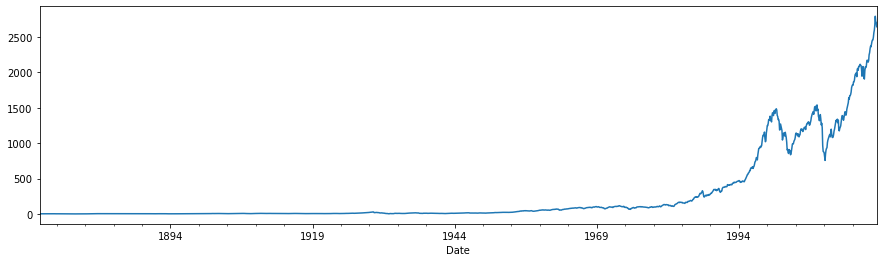

In [12]:
df.groupby(pd.Grouper(key= 'Date', freq='M'))['SP500'].sum().plot(figsize=(15, 4))

In [13]:
df.isna().sum()

Date                      0
SP500                     0
Dividend                  1
Earnings                  4
Consumer Price Index      0
Long Interest Rate        0
Real Price                0
Real Dividend             1
Real Earnings             4
PE10                    120
dtype: int64

In [14]:
df.set_index('Date', inplace=True)

In [15]:
df.index

DatetimeIndex(['1871-01-01', '1871-02-01', '1871-03-01', '1871-04-01',
               '1871-05-01', '1871-06-01', '1871-07-01', '1871-08-01',
               '1871-09-01', '1871-10-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=1768, freq=None)

In [18]:
sub10_17 = df.loc['2010-01-01': '2017-12-01']['SP500']
sub10_17

Date
2010-01-01    1123.58
2010-02-01    1089.16
2010-03-01    1152.05
2010-04-01    1197.32
2010-05-01    1125.06
               ...   
2017-08-01    2456.22
2017-09-01    2492.84
2017-10-01    2557.00
2017-11-01    2593.61
2017-12-01    2664.34
Name: SP500, Length: 96, dtype: float64

In [31]:
df.loc['2010-01-01': '2017-12-01']

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
2010-01-01,1123.58,22.24,54.29,216.69,3.73,1295.46,25.64,62.60,20.53
2010-02-01,1089.16,22.07,57.61,216.74,3.69,1255.47,25.44,66.41,19.92
2010-03-01,1152.05,21.90,60.93,217.63,3.73,1322.53,25.14,69.95,21.00
2010-04-01,1197.32,21.95,62.99,218.01,3.85,1372.11,25.15,72.18,21.80
2010-05-01,1125.06,21.99,65.04,218.18,3.42,1288.31,25.18,74.48,20.48
...,...,...,...,...,...,...,...,...,...
2017-08-01,2456.22,47.85,106.06,245.52,2.21,2499.40,48.69,107.92,29.91
2017-09-01,2492.84,48.17,107.08,246.82,2.20,2523.31,48.76,108.39,30.17
2017-10-01,2557.00,48.42,108.01,246.66,2.36,2589.89,49.05,109.40,30.92


<AxesSubplot:xlabel='Date'>

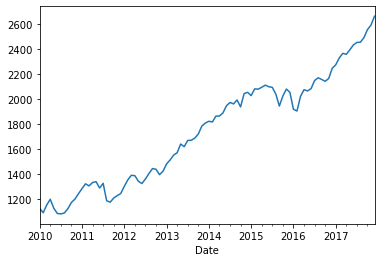

In [19]:
sub10_17.plot()

**Time series decomposition.**

In [20]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15.0, 6.0]

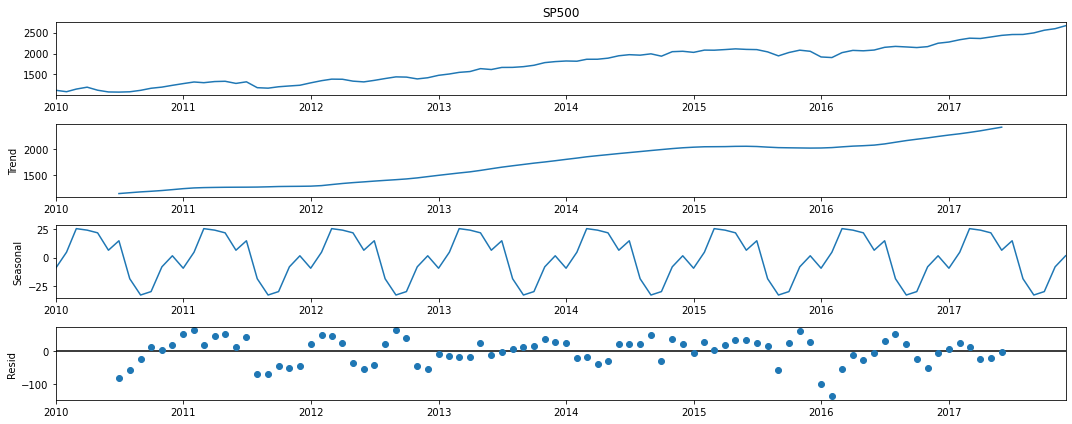

In [22]:
decomposition = sm.tsa.seasonal_decompose(sub10_17,model='additive')
decomposition.plot();

**Time series feature engineering.**

In [23]:
# LAGS and Windows

lag5 = sub10_17.shift(5, )

In [25]:
lag5.head(11)

Date
2010-01-01        NaN
2010-02-01        NaN
2010-03-01        NaN
2010-04-01        NaN
2010-05-01        NaN
2010-06-01    1123.58
2010-07-01    1089.16
2010-08-01    1152.05
2010-09-01    1197.32
2010-10-01    1125.06
2010-11-01    1083.36
Name: SP500, dtype: float64

In [29]:
# adding features to the time series
# features include (time related) and this
# time related features include (month name, day of the week, day of the month etc.)
lagged  = sub10_17.shift(1)
window = lagged.rolling(window=7)
means = window.mean()
max_ = window.max()
min_ =window.min()

new_sub= pd.concat([sub10_17, lagged, means, max_, min_], axis=1)
new_sub.columns = ['S&P500', 'lag1', 'mean', 'max', 'min']

In [30]:
new_sub.head(12)

,S&P500,lag1,mean,max,min
Date,,,,,
2010-01-01,1123.58,NaN,NaN,NaN,NaN
2010-02-01,1089.16,1123.58,NaN,NaN,NaN
2010-03-01,1152.05,1089.16,NaN,NaN,NaN
2010-04-01,1197.32,1152.05,NaN,NaN,NaN
2010-05-01,1125.06,1197.32,NaN,NaN,NaN
2010-06-01,1083.36,1125.06,NaN,NaN,NaN
2010-07-01,1079.80,1083.36,NaN,NaN,NaN
2010-08-01,1087.28,1079.80,1121.475714,1197.32,1079.8
2010-09-01,1122.08,1087.28,1116.290000,1197.32,1079.8
